<a href="https://colab.research.google.com/github/Brunolts01/data_science/blob/main/Projeto_Analisando_os_Dados_do_Airbnb_San_Francisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade San Francisco (California), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [44]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/san-francisco/2021-12-04/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,161,2,314,2021-11-19,3.60,1,126,43,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.76,1,365,0,NaN
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365,0,NaN
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,364,0,STR-0000264


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [17]:
# identificar o volume de dados do DataFrame
print('Número de variáveis do dataset:\t{}'.format(df.shape[1]))
print('Númeo de entradas do dataset:\t{}'.format(df.shape[0]))
# verificar as 5 primeiras entradas do dataset


Número de variáveis do dataset:	18
Númeo de entradas do dataset:	6413


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [21]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.434274
reviews_per_month                 0.208327
last_review                       0.208327
host_name                         0.002183
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

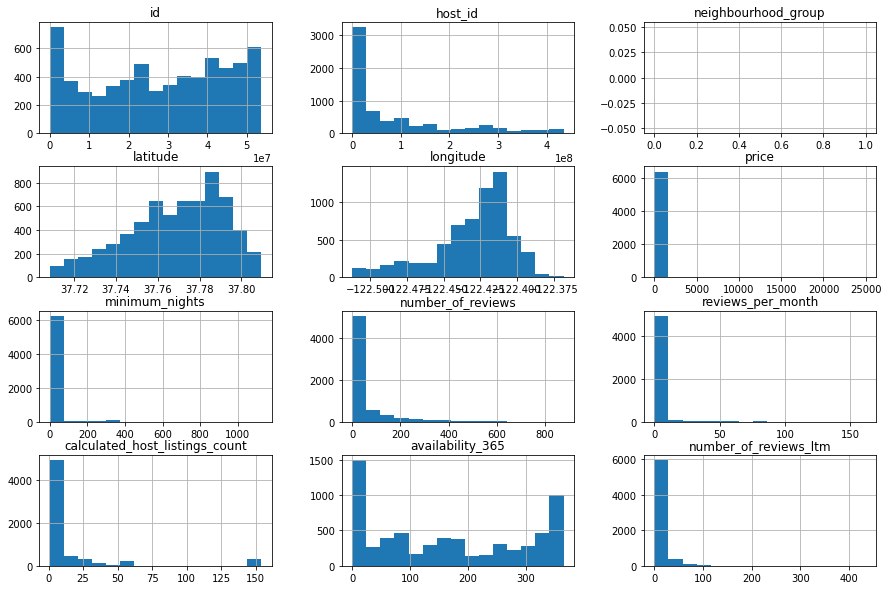

In [27]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [33]:
# ver a média da coluna `price``

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,6413.000000,6413.000000,6413.000000,5077.000000,6413.000000
mean,228.636520,24.007797,44.483861,2.055937,166.752534
std,671.915606,49.746920,85.496409,5.745197,133.528567
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,93.000000,2.000000,1.000000,0.210000,33.000000
50%,145.000000,30.000000,7.000000,0.670000,153.000000
75%,232.000000,30.000000,45.000000,2.130000,306.000000
max,25000.000000,1125.000000,877.000000,162.000000,365.000000


* A média de preço é 228, porém a máxima fica em 25000. Provavelmente há outliers e vamos tratá-los.

* Identificado outliers também nas colunas de minimum nights, number of reviews e reviews_per_month

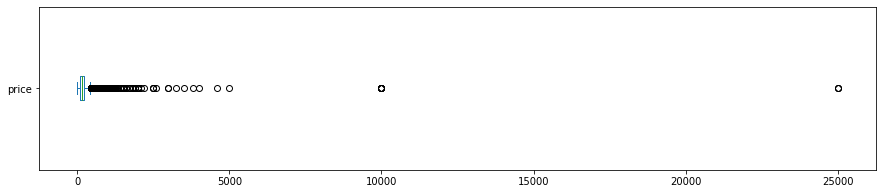

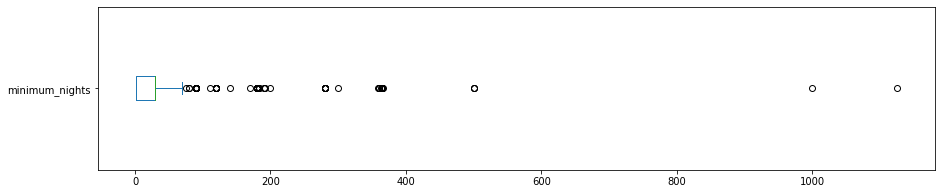

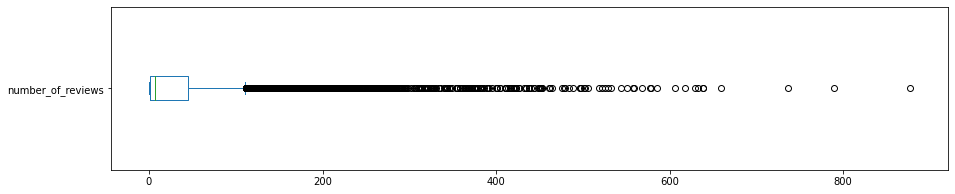

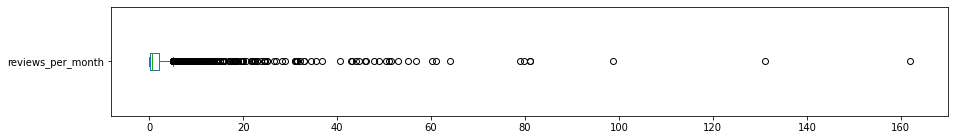

In [46]:
# Plotando boxplot para identificar outliers

df.price.plot(kind='box', vert=False, figsize = (15,3));
plt.show()
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.show()
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3));
plt.show()
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,2));
plt.show()


In [57]:
# Número de outliers por variável

# Price
print('\nprice: Valores acima de de 4000')
print('{} entradas'.format(len(df[df.price > 4000])))
print('{:.4f}%'.format(len(df[df.price > 1000]) / df.shape[0] * 100) ) 

# Minimum nights
print('\nminimum_nights: Valores acima de 30 noites')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format(len(df[df.minimum_nights > 30]) / df.shape[0] * 100))



price: Valores acima de de 4000
12 entradas
1.3254%

minimum_nights: Valores acima de 30 noites
380 entradas
5.9255%


* Identificado os outliers e tendo conhecimento do percentual representativo deles sobre a base vamos retirá-los e plotar um novo histograma com base nos novos dados. 

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,6022.000000,6022.000000,6022.000000,4881.000000,6022.000000
mean,207.394387,16.435404,46.954002,2.124472,163.332946
std,225.931234,13.831755,87.576010,5.847882,131.987733
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,95.000000,2.000000,1.000000,0.230000,32.000000
50%,148.000000,30.000000,8.000000,0.710000,150.000000
75%,235.000000,30.000000,49.000000,2.230000,299.750000
max,3990.000000,30.000000,877.000000,162.000000,365.000000


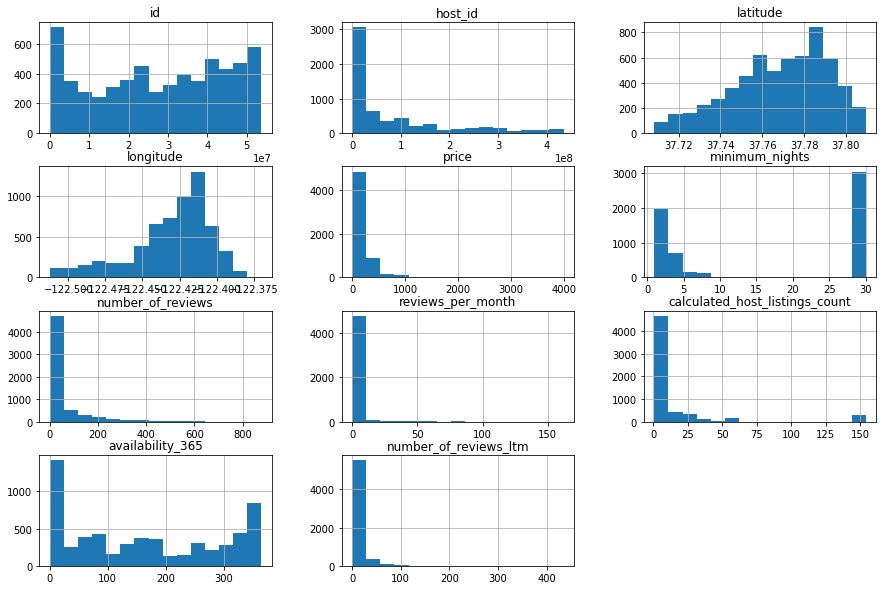

In [64]:
# Criando uma cópia do dataset
df_clean = df.copy()

# Excluindo outliers de preços
df_clean.drop(df_clean[df_clean.price > 4000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Removendo coluna 'neighbourhood_group' que só contém valores ausentes

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando histograma com dados tratados
df_clean.hist(bins=15, figsize=(15,10));

# Descrição com dados tratados

df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].describe()


### **Q4. Qual a correlação existente entre as variáveis**

In [65]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
price,1.000000,-0.043256,-0.044250,-0.030708,-0.042397,-0.032045
minimum_nights,-0.043256,1.000000,-0.163003,-0.107289,0.209016,0.100149
number_of_reviews,-0.044250,-0.163003,1.000000,0.256977,-0.038447,-0.164693
reviews_per_month,-0.030708,-0.107289,0.256977,1.000000,-0.000607,-0.086198
availability_365,-0.042397,0.209016,-0.038447,-0.000607,1.000000,0.105267
calculated_host_listings_count,-0.032045,0.100149,-0.164693,-0.086198,0.105267,1.000000


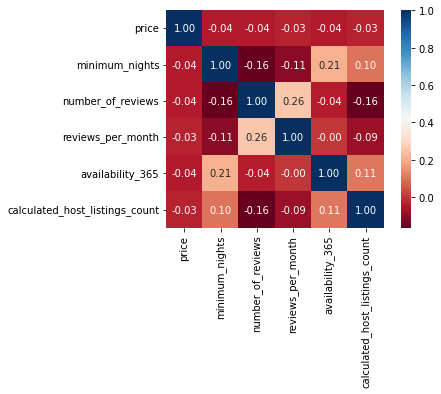

In [68]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square = True, linecolor = 'White', annot = True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [71]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    3911
Private room       1920
Shared room         130
Hotel room           61
Name: room_type, dtype: int64

In [74]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.609855
Private room       0.299392
Shared room        0.020271
Hotel room         0.009512
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [79]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Russian Hill             315.566038
Marina                   302.098266
Presidio                 300.222222
Castro/Upper Market      267.527473
North Beach              266.027322
Twin Peaks               264.360000
Pacific Heights          259.602941
Glen Park                246.877193
Inner Sunset             245.226950
Financial District       241.551020
Potrero Hill             240.657343
Diamond Heights          236.500000
Noe Valley               224.785714
Downtown/Civic Center    222.532695
Western Addition         218.106888
Nob Hill                 212.408240
Chinatown                206.413793
Presidio Heights         203.272727
Golden Gate Park         196.750000
Inner Richmond           194.626506
Haight Ashbury           189.533333
Bernal Heights           188.660777
Outer Richmond           187.714286
South of Market          187.125874
Mission                  184.784884
Seacliff                 176.090909
West of Twin Peaks       175.202381
Outer Mission 

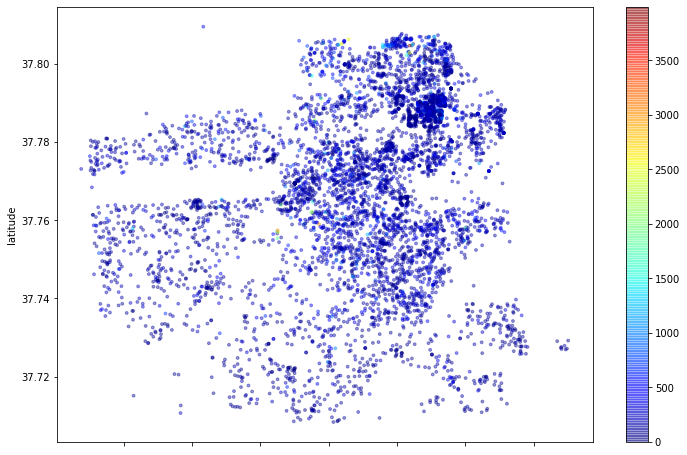

In [87]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [88]:
# ver a média da coluna `minimum_nights``

print('{} é a média do mínimo de noites para alugar um imóvel em San Francisco(Califórnia)'.format(int(df_clean.minimum_nights.mean())))

16 é a média do mínimo de noites para alugar um imóvel em San Francisco(Califórnia)


## Conclusões


* Russian Hill é o bairro mais caro para alugar um imóvel na cidade de San Francisco (Conforme pesquisa realizada, há pontos turísticos neste local).
* A média do mínimo de noites para alugar um imóvel em San Francisco é de 16.
* A média de preço de um imóvel em San Francisco é 207.
* Em média cada imóvel tem 2 reviews por mês.
* Em média dentro de um ano os imóveis ficam disponíveis 163 dias.